In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [10]:
# URL pro raw csv que ta no git
#url = 'datasets/myo-parado-luiza-2019-05-02 12:12:33-.csv'
#url2 = 'datasets/myo-movendo-luiza-2019-05-02 12:11:37-.csv'
url = 'datasets/myo-parado-david3-2019-05-09 10:32:57-.csv'
#url = 'datasets/myo-parado-david2-2019-05-09 10:23:19-.csv'
url2 = 'datasets/myo-movimento-david-2019-05-09 10:28:09-.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv(url)
Dataset_movendo = pd.read_csv(url2)



scaler = preprocessing.MinMaxScaler(feature_range=(-120, 120))

Dataset = pd.DataFrame((scaler.fit_transform(Dataset)))
Dataset_movendo = pd.DataFrame((scaler.fit_transform(Dataset_movendo)))

size = 400

#Normaliza e transforma em numpy array
Normalized_Data = preprocessing.normalize(Dataset)

print("Original Dataset")
print (Dataset.head())


print("\n\nNormalized Dataset")
print (Normalized_Data)


# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
Scaled_Data = scaler.fit_transform(Dataset)
Scaled_Data = pd.DataFrame(Scaled_Data)

print("\n\nScaled Dataset")
print (Scaled_Data.head)

Original Dataset
           0           1           2           3          4           5   \
0 -120.000000 -120.000000 -117.958412 -114.128440 -84.351939 -117.517241   
1 -119.398496 -119.788452 -111.833648 -107.889908 -60.056764 -109.034483   
2 -118.796992 -119.600372 -111.833648 -107.889908 -60.056764 -109.034483   
3 -118.195489 -119.321411 -109.792060 -106.238532 -56.423841 -105.931034   
4 -117.593985 -119.135773 -109.792060 -106.238532 -56.423841 -105.931034   

           6          7          8           9          10         11  \
0 -102.045455 -79.857651 -98.503401 -120.000000 -10.021786  43.791469   
1  -95.909091 -70.889680 -89.251701 -118.556701 -10.021786  43.791469   
2  -95.909091 -70.889680 -89.251701 -118.556701   2.004357  43.222749   
3  -80.000000 -62.775801 -71.564626 -117.525773   2.004357  43.222749   
4  -80.000000 -62.775801 -71.564626 -117.525773  16.122004  60.284360   

          12         13         14        15  
0 -32.398190 -31.237553  14.465753 -2.10

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
Dataset.columns

RangeIndex(start=0, stop=16, step=1)

In [12]:
Dataset["Variance"] = Dataset.var(axis=1)
Dataset["Mean"] = Dataset.mean(axis=1)
print("Mean")
print(Dataset.get("Variance").head(10))

print("\nVariance")
print(Dataset.get("Mean").head(10))


Mean
0    3153.648487
1    2914.047352
2    2967.394342
3    2803.961169
4    3522.294889
5    3092.887940
6    3958.719414
7    3953.862871
8    3899.346419
9    4296.472553
Name: Variance, dtype: float64

Variance
0    121.281199
1    111.407815
2    115.283498
3    108.849239
4    155.402286
5    140.567468
6    192.540111
7    201.793424
8    192.128490
9    230.010301
Name: Mean, dtype: float64


In [13]:
ax = np.linspace(0,size,size,endpoint=True)
for i in range(8):
    plt.ylim(bottom=-120,top=120)
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    #column = "Sensor "+str(i)
    column = i+2
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

In [14]:
ax = np.linspace(0,size,size,endpoint=True)
for i in range(8):
    plt.ylim(bottom=-120,top=120)
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    #column = "Sensor "+str(i)
    column = i+2
    l = list(Dataset_movendo.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

In [15]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    #column = "Sensor "+str(i)
    column = i+2
    l = list(Dataset.get(column))
    plt.plot(abs(np.fft.rfft(l)[:100]))
    plt.grid()

plt.draw()
plt.show()

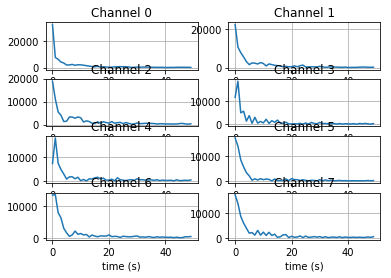

In [16]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    #column = "Sensor "+str(i)
    column = i+2
    l2 = list(Dataset_movendo.get(column))
    plt.plot(abs(np.fft.rfft(l2)[:50]))
    plt.grid()

plt.draw()
plt.show()

In [17]:
plt.plot(abs(np.fft.rfft(l)[1:]))

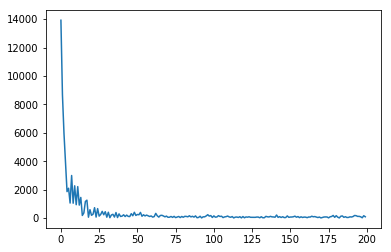

In [18]:
plt.plot(abs(np.fft.rfft(l2)[1:]))

In [11]:
Dataset.describe

<bound method NDFrame.describe of               0           1      2      3          4           5           6  \
0   -120.000000 -120.000000 -102.0 -103.0  -8.316832   -1.904762  -61.764706   
1   -119.398496 -119.820786  -91.5  -89.0  15.445545   17.142857  -75.882353   
2   -118.796992 -119.589203  -91.5  -89.0  15.445545   17.142857  -75.882353   
3   -118.195489 -119.392410  -81.0  -83.0   7.128713   43.809524  -54.705882   
4   -117.593985 -119.225220  -81.0  -83.0   7.128713   43.809524  -54.705882   
5   -116.992481 -119.063354  -57.0  -69.0  24.950495   59.047619  -58.235294   
6   -116.390977 -118.886658  -57.0  -69.0  24.950495   59.047619  -58.235294   
7   -115.789474 -118.693451  -45.0  -48.0  29.702970  104.761905   22.941176   
8   -115.187970 -118.534637  -45.0  -48.0  29.702970  104.761905   22.941176   
9   -114.586466 -118.399170  -36.0  -36.0  -2.376238   59.047619   45.882353   
10  -113.984962 -118.262390  -36.0  -36.0  -2.376238   59.047619   45.882353   
11  -1

In [12]:
Dataset.max

<bound method DataFrame.max of               0           1      2      3          4           5           6  \
0   -120.000000 -120.000000 -102.0 -103.0  -8.316832   -1.904762  -61.764706   
1   -119.398496 -119.820786  -91.5  -89.0  15.445545   17.142857  -75.882353   
2   -118.796992 -119.589203  -91.5  -89.0  15.445545   17.142857  -75.882353   
3   -118.195489 -119.392410  -81.0  -83.0   7.128713   43.809524  -54.705882   
4   -117.593985 -119.225220  -81.0  -83.0   7.128713   43.809524  -54.705882   
5   -116.992481 -119.063354  -57.0  -69.0  24.950495   59.047619  -58.235294   
6   -116.390977 -118.886658  -57.0  -69.0  24.950495   59.047619  -58.235294   
7   -115.789474 -118.693451  -45.0  -48.0  29.702970  104.761905   22.941176   
8   -115.187970 -118.534637  -45.0  -48.0  29.702970  104.761905   22.941176   
9   -114.586466 -118.399170  -36.0  -36.0  -2.376238   59.047619   45.882353   
10  -113.984962 -118.262390  -36.0  -36.0  -2.376238   59.047619   45.882353   
11  -113.

In [16]:
import pywt
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

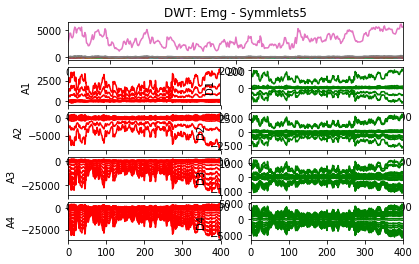

In [22]:
mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(4):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure()
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(Dataset, 'sym5', "DWT: Emg - Symmlets5")


plt.show()

In [27]:
coeffs2 = pywt.dwt2(Dataset, 'sym5')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(30, 10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [28]:
Dataset.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'Variance',
       'Mean'],
      dtype='object')